# Optimize the Model

Achieve a target predictive accuracy higher than 75% by using "any or all" of the following:

1) Adjusting the input data to ensure that there are no variables or outliers that are causing confusion in the model, such as:
    
    Dropping more or fewer columns.
    
    Creating more bins for rare occurrences in columns.
    
    Increasing or decreasing the number of values for each bin.

2) Adding more neurons to a hidden layer.
3) Adding more hidden layers.
4) Using different activation functions for the hidden layers.
5) Adding or reducing the number of epochs to the training regimen.

Current Parameters:

In [1]:
# Cutoffs
name_cutoff = 10
application_cutoff = 200 # Original: 200, Applications types with less than this number will be added to a combined type
classification_cutoff = 1000 # Original: 1000, Classification types with less than this number will be added to a combined type

# Number of Neurons
neurons_1 = 27  # Original: 80
neurons_2 = 5  # Original: 30
neurons_3 = 3
neurons_4 = 7

# Activation Types
activation_1 = "relu" # Original: "relu"
activation_2 = "sigmoid" # Original: "relu"
activation_3 = "sigmoid"
activation_4 = "sigmoid"
activation_outer = "sigmoid" # Original: "sigmoid"

#Number of Epochs
num_epochs = 20 # Original: 50

# Preprocessing

In [183]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing
import pandas as pd
import tensorflow as tf
import keras

#  Import and read the charity_data.csv.
import pandas as pd 
# application_df = pd.read_csv("Resources/charity_data.csv")
# application_df.head()

In [102]:
parse_dates = ["GAME DATE"]
nba_df = pd.DataFrame(pd.read_csv("Data/Sample_NBA_Data_Reg_Season_2022.csv", parse_dates=parse_dates))

nba_teams_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_adv_stats.csv"))
nba_def_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_def.csv"))
nba_off_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_off.csv"))
nba_post_adv_stats_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_adv_stats.csv"))
nba_post_def_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_def.csv"))
nba_post_off_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_off.csv"))

reg_season_compiled = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_reg_compiled_stats.csv").drop(['Unnamed: 0'],axis=1))
post_season_compiled = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_compiled_stats.csv").drop(['Unnamed: 0'],axis=1))

In [39]:
reg_season_compiled

,Team,MP,Off_FG,Off_FGA,Off_FG%,Off_3P,Off_3PA,Off_3P%,Off_2P,Off_2PA,...,TS%,Off_eFG%,Off_TOV%,Off_ORB%,Off_FT/FGA,Def_eFG%,Def_TOV%,Def_DRB%,Def_FT/FGA,Attend./G
0,Minnesota Timberwolves,241.2,41.6,91.0,0.457,14.8,41.3,0.358,26.8,49.7,...,0.573,0.539,12.4,24.4,0.198,0.535,14.2,74.9,0.227,16028
1,Memphis Grizzlies,241.2,43.5,94.4,0.461,11.5,32.7,0.353,32.0,61.7,...,0.553,0.522,11.2,30.0,0.180,0.523,13.3,77.8,0.195,15775
2,Milwaukee Bucks,240.9,41.8,89.4,0.468,14.1,38.4,0.366,27.8,51.0,...,0.580,0.546,11.9,23.0,0.199,0.536,11.6,78.6,0.165,17453
3,Charlotte Hornets,242.4,42.8,91.4,0.468,13.9,38.2,0.365,28.8,53.3,...,0.572,0.544,11.6,23.3,0.173,0.544,13.1,74.8,0.187,17092
4,Phoenix Suns,240.6,43.7,90.1,0.485,11.6,31.9,0.364,32.1,58.2,...,0.581,0.549,11.6,22.3,0.176,0.510,13.0,77.1,0.195,16175
5,Atlanta Hawks,240.3,41.5,88.3,0.470,12.9,34.4,0.374,28.6,53.9,...,0.581,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,16408
6,Utah Jazz,240.6,40.6,86.2,0.471,14.5,40.3,0.360,26.0,45.8,...,0.589,0.555,12.7,25.4,0.208,0.521,10.9,78.3,0.164,18306
7,San Antonio Spurs,241.5,43.2,92.7,0.467,11.3,32.0,0.352,32.0,60.7,...,0.556,0.527,11.1,23.7,0.166,0.532,12.1,75.1,0.176,15014
8,Brooklyn Nets,240.9,42.0,88.4,0.475,11.5,31.7,0.361,30.5,56.7,...,0.576,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,17355
9,Denver Nuggets,241.5,41.7,86.3,0.483,12.7,35.9,0.353,29.0,50.4,...,0.590,0.556,13.2,21.9,0.194,0.537,11.7,78.3,0.188,16958


All we know about a game beforehand is Team, Match Up, and Game Date (this can probably be dropped). The info "created" by the game is W/L and everything to the right.
For the flower model, the features are everything you "know", and the target is the "conclusion"





In [56]:
team_names_series = reg_season_compiled["Team"]

team_abbv = ["MIN", "MEM", "MIL", "CHA", "PHX", "ATL", "UTA", "SAS", "BKN", "DEN", "LAL", "BOS", "CHI", "IND", "GSW", "SAC", "MIA", "PHI", "HOU", "TOR", "NOP", "WAS", "LAC", "DAL", "CLE", "NYK", "POR", "DET", "ORL", "OKC"]
team_abbv_series = pd.Series(team_abbv)

frame = { 'Team': team_names_series, 'ABBV': team_abbv_series }

name_abbv = pd.DataFrame(frame)

name_abbv

,Team,ABBV
0,Minnesota Timberwolves,MIN
1,Memphis Grizzlies,MEM
2,Milwaukee Bucks,MIL
3,Charlotte Hornets,CHA
4,Phoenix Suns,PHX
5,Atlanta Hawks,ATL
6,Utah Jazz,UTA
7,San Antonio Spurs,SAS
8,Brooklyn Nets,BKN
9,Denver Nuggets,DEN


In [57]:
# Merge Agg Data with Abbv
# reg_season_compiled
# name_abbv

reg_season_abbv = reg_season_compiled.merge(name_abbv, how = "left", on = "Team")

In [141]:
for i in range(0, len(reg_season_abbv) + 1):
    print(f"{reg_season_abbv.columns[i]}: {reg_season_abbv.dtypes[i]}")
# reg_season_abbv.dtypes

Team: object
MP: float64
Off_FG: float64
Off_FGA: float64
Off_FG%: float64
Off_3P: float64
Off_3PA: float64
Off_3P%: float64
Off_2P: float64
Off_2PA: float64
Off_2P%: float64
Off_FT: float64
Off_FTA: float64
Off_FT%: float64
Off_ORB: float64
Off_DRB: float64
Off_TRB: float64
Off_AST: float64
Off_STL: float64
Off_BLK: float64
Off_TOV: float64
Off_PF: float64
Off_PTS: float64
Def_FG: float64
Def_FGA: float64
Def_FG%: float64
Def_3P: float64
Def_3PA: float64
Def_3P%: float64
Def_2P: float64
Def_2PA: float64


In [103]:
nba_df.head(50)

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,MIN,MIN vs. CHI,2022-04-10,L,240,120,46,91,50.5,11,...,77.3,9,23,32,30,7,9,13,23,-4
1,CHI,CHI @ MIN,2022-04-10,W,240,124,44,83,53.0,10,...,78.8,16,32,48,22,9,3,23,22,4
2,PHI,PHI vs. DET,2022-04-10,W,240,118,46,88,52.3,5,...,91.3,10,32,42,25,13,6,11,23,12
3,DET,DET @ PHI,2022-04-10,L,240,106,38,83,45.8,11,...,65.5,15,27,42,26,4,4,20,16,-12
4,MEM,MEM vs. BOS,2022-04-10,L,240,110,39,102,38.2,15,...,63.0,19,26,45,27,11,6,10,16,-29
5,BOS,BOS @ MEM,2022-04-10,W,240,139,54,99,54.5,18,...,100.0,14,42,56,34,5,2,15,20,29
6,LAL,LAL @ DEN,2022-04-10,W,265,146,44,94,46.8,16,...,89.4,13,37,50,26,4,6,13,24,5
7,DEN,DEN vs. LAL,2022-04-10,L,265,141,49,100,49.0,15,...,77.8,11,34,45,33,10,7,14,34,-5
8,ORL,ORL vs. MIA,2022-04-10,W,240,125,45,91,49.5,23,...,85.7,6,42,48,33,4,3,10,16,14
9,MIA,MIA @ ORL,2022-04-10,L,240,111,40,94,42.6,19,...,75.0,10,37,47,20,5,4,10,13,-14


In [117]:
matches = nba_df[["TEAM", "MATCH UP", "GAME DATE", "W/L"]].copy()

In [118]:
matches[["TEAM", "TYPE", "OPPONENT"]] = matches['MATCH UP'].apply(lambda x: pd.Series(x.split(' ')))

In [119]:
matches = matches.drop(["MATCH UP", "GAME DATE"], axis = 1)

In [120]:
matches.dtypes

TEAM        object
W/L         object
TYPE        object
OPPONENT    object
dtype: object

In [121]:
# Distinguish Opponent Data from Team Data
oppo_reg_season_abbv = reg_season_abbv.add_prefix('OPPO_')

In [203]:
# Merge Team Agg Info with Game Info, twice...
# matches
# reg_season_abbv
# oppo_reg_season_abbv


team_games_data = matches.merge(reg_season_abbv, how = "left", left_on = "TEAM", right_on = "ABBV").merge(oppo_reg_season_abbv, how = "left", left_on = "TEAM", right_on = "OPPO_ABBV")


In [204]:
team_games_data

,TEAM,W/L,TYPE,OPPONENT,Team,MP,Off_FG,Off_FGA,Off_FG%,Off_3P,...,OPPO_Off_eFG%,OPPO_Off_TOV%,OPPO_Off_ORB%,OPPO_Off_FT/FGA,OPPO_Def_eFG%,OPPO_Def_TOV%,OPPO_Def_DRB%,OPPO_Def_FT/FGA,OPPO_Attend./G,OPPO_ABBV
0,MIN,L,vs.,CHI,Minnesota Timberwolves,241.2,41.6,91.0,0.457,14.8,...,0.539,12.4,24.4,0.198,0.535,14.2,74.9,0.227,16028,MIN
1,CHI,W,@,MIN,Chicago Bulls,240.6,41.7,86.9,0.480,10.6,...,0.541,11.8,20.4,0.201,0.541,11.9,78.3,0.199,20882,CHI
2,PHI,W,vs.,DET,Philadelphia 76ers,241.5,39.4,84.5,0.466,11.6,...,0.534,11.6,20.1,0.232,0.524,12.1,76.8,0.192,20655,PHI
3,DET,L,@,PHI,Detroit Pistons,241.2,38.2,88.6,0.431,11.3,...,0.494,12.6,23.4,0.194,0.541,13.1,75.6,0.226,16184,DET
4,MEM,L,vs.,BOS,Memphis Grizzlies,241.2,43.5,94.4,0.461,11.5,...,0.522,11.2,30.0,0.180,0.523,13.3,77.8,0.195,15775,MEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,SAC,W,@,ORL,Sacramento Kings,241.5,40.5,88.1,0.460,11.4,...,0.525,12.5,21.3,0.203,0.551,11.9,76.0,0.176,14087,SAC
246,MIA,L,vs.,BKN,Miami Heat,242.1,39.6,84.8,0.467,13.6,...,0.547,13.4,23.5,0.204,0.524,13.8,78.0,0.209,19628,MIA
247,BKN,W,@,MIA,Brooklyn Nets,240.9,42.0,88.4,0.475,11.5,...,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,17355,BKN
248,SAS,W,@,NOP,San Antonio Spurs,241.5,43.2,92.7,0.467,11.3,...,0.527,11.1,23.7,0.166,0.532,12.1,75.1,0.176,15014,SAS


In [189]:
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(team_games_data['W/L'])

In [208]:
y = pd.get_dummies(team_games_data['W/L'])

In [209]:
y = y["W"]
y

0      0
1      1
2      1
3      0
4      0
      ..
245    1
246    0
247    1
248    1
249    0
Name: W, Length: 250, dtype: uint8

In [174]:
# y = pd.get_dummies(team_games_data['W/L'])

In [210]:
team_games_data = team_games_data.drop(['W/L', "Team", "OPPO_Team", "ABBV", "OPPO_ABBV"], axis = 1)

In [221]:
team_games_data

,TEAM,TYPE,OPPONENT,MP,Off_FG,Off_FGA,Off_FG%,Off_3P,Off_3PA,Off_3P%,...,OPPO_TS%,OPPO_Off_eFG%,OPPO_Off_TOV%,OPPO_Off_ORB%,OPPO_Off_FT/FGA,OPPO_Def_eFG%,OPPO_Def_TOV%,OPPO_Def_DRB%,OPPO_Def_FT/FGA,OPPO_Attend./G
0,MIN,vs.,CHI,241.2,41.6,91.0,0.457,14.8,41.3,0.358,...,0.573,0.539,12.4,24.4,0.198,0.535,14.2,74.9,0.227,16028
1,CHI,@,MIN,240.6,41.7,86.9,0.480,10.6,28.8,0.369,...,0.579,0.541,11.8,20.4,0.201,0.541,11.9,78.3,0.199,20882
2,PHI,vs.,DET,241.5,39.4,84.5,0.466,11.6,31.8,0.364,...,0.578,0.534,11.6,20.1,0.232,0.524,12.1,76.8,0.192,20655
3,DET,@,PHI,241.2,38.2,88.6,0.431,11.3,34.6,0.326,...,0.533,0.494,12.6,23.4,0.194,0.541,13.1,75.6,0.226,16184
4,MEM,vs.,BOS,241.2,43.5,94.4,0.461,11.5,32.7,0.353,...,0.553,0.522,11.2,30.0,0.180,0.523,13.3,77.8,0.195,15775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,SAC,@,ORL,241.5,40.5,88.1,0.460,11.4,33.2,0.344,...,0.561,0.525,12.5,21.3,0.203,0.551,11.9,76.0,0.176,14087
246,MIA,vs.,BKN,242.1,39.6,84.8,0.467,13.6,35.8,0.379,...,0.584,0.547,13.4,23.5,0.204,0.524,13.8,78.0,0.209,19628
247,BKN,@,MIA,240.9,42.0,88.4,0.475,11.5,31.7,0.361,...,0.576,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,17355
248,SAS,@,NOP,241.5,43.2,92.7,0.467,11.3,32.0,0.352,...,0.556,0.527,11.1,23.7,0.166,0.532,12.1,75.1,0.176,15014


In [211]:
# Convert categorical data to numeric with `pd.get_dummies`
team_games_data_dummies = pd.get_dummies(team_games_data)
team_games_data_dummies.shape

(250, 196)

In [212]:
team_games_data_dummies.columns

Index(['MP', 'Off_FG', 'Off_FGA', 'Off_FG%', 'Off_3P', 'Off_3PA', 'Off_3P%',
       'Off_2P', 'Off_2PA', 'Off_2P%',
       ...
       'OPPONENT_OKC', 'OPPONENT_ORL', 'OPPONENT_PHI', 'OPPONENT_PHX',
       'OPPONENT_POR', 'OPPONENT_SAC', 'OPPONENT_SAS', 'OPPONENT_TOR',
       'OPPONENT_UTA', 'OPPONENT_WAS'],
      dtype='object', length=196)

In [213]:
for i in range(0, len(team_games_data_dummies.columns) - 1):
    print(f"{team_games_data_dummies.columns[i]}: {team_games_data_dummies.dtypes[i]}")
# reg_season_abbv.dtypes

MP: float64
Off_FG: float64
Off_FGA: float64
Off_FG%: float64
Off_3P: float64
Off_3PA: float64
Off_3P%: float64
Off_2P: float64
Off_2PA: float64
Off_2P%: float64
Off_FT: float64
Off_FTA: float64
Off_FT%: float64
Off_ORB: float64
Off_DRB: float64
Off_TRB: float64
Off_AST: float64
Off_STL: float64
Off_BLK: float64
Off_TOV: float64
Off_PF: float64
Off_PTS: float64
Def_FG: float64
Def_FGA: float64
Def_FG%: float64
Def_3P: float64
Def_3PA: float64
Def_3P%: float64
Def_2P: float64
Def_2PA: float64
Def_2P%: float64
Def_FT: float64
Def_FTA: float64
Def_FT%: float64
Def_ORB: float64
Def_DRB: float64
Def_TRB: float64
Def_AST: float64
Def_STL: float64
Def_BLK: float64
Def_TOV: float64
Def_PF: float64
Def_PTS: float64
Age: float64
W: int64
L: int64
PW: int64
PL: int64
MOV: float64
SOS: float64
SRS: float64
ORtg: float64
DRtg: float64
NRtg: float64
Pace: float64
FTr: float64
3PAr: float64
TS%: float64
Off_eFG%: float64
Off_TOV%: float64
Off_ORB%: float64
Off_FT/FGA: float64
Def_eFG%: float64
Def_TO

In [214]:
# Split our preprocessed data into our features and target arrays
X = team_games_data_dummies
# y = team_games_dummies['W/L']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [215]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Start Models

In [216]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = neurons_1, activation = activation_1, input_dim = num_features))

# Second hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_2, activation = activation_2))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_3, activation = activation_3))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_4, activation = activation_4))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = activation_outer))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 27)                5319      
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 140       
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_28 (Dense)             (None, 7)                 28        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 8         
Total params: 5,513
Trainable params: 5,513
Non-trainable params: 0
_________________________________________________________________


In [217]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [218]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=num_epochs)

Epoch 1/20
6/6 [==============================] - 0s 499us/step - loss: 0.6963 - accuracy: 0.4920
Epoch 2/20
6/6 [==============================] - 0s 499us/step - loss: 0.6948 - accuracy: 0.4920
Epoch 3/20
6/6 [==============================] - 0s 499us/step - loss: 0.6939 - accuracy: 0.4920
Epoch 4/20
6/6 [==============================] - 0s 499us/step - loss: 0.6928 - accuracy: 0.4920
Epoch 5/20
6/6 [==============================] - 0s 499us/step - loss: 0.6920 - accuracy: 0.4920
Epoch 6/20
6/6 [==============================] - 0s 499us/step - loss: 0.6916 - accuracy: 0.4920
Epoch 7/20
6/6 [==============================] - 0s 499us/step - loss: 0.6907 - accuracy: 0.4920
Epoch 8/20
6/6 [==============================] - 0s 499us/step - loss: 0.6902 - accuracy: 0.4920
Epoch 9/20
6/6 [==============================] - 0s 333us/step - loss: 0.6895 - accuracy: 0.4866
Epoch 10/20
6/6 [==============================] - 0s 499us/step - loss: 0.6888 - accuracy: 0.5401
Epoch 11/20
6/6 [==

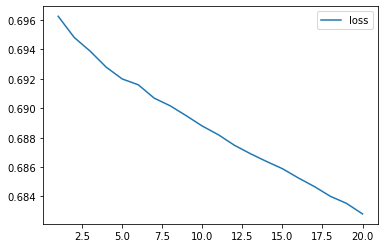

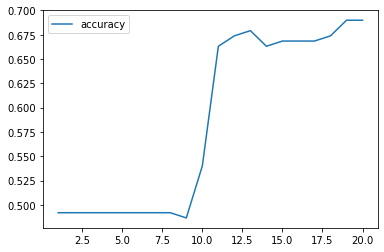

In [219]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
history_df.plot(y="accuracy");

In [220]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.6889865398406982, Accuracy: 0.60317462682724


# GAME PREDICTION

In [273]:
# Boston Celtics vs Golden State Warriors
team_A = "BOS" #TEAM BOS
game_type = "@" #TYPE
team_B = "GSW" #OPPONENT GSW

d = {"TEAM": team_A, "TYPE": game_type, "OPPONENT": team_B}

current_match = pd.DataFrame(data = d, index=[0])
current_match

,TEAM,TYPE,OPPONENT
0,BOS,@,GSW


In [274]:
current_game_data = current_match.merge(reg_season_abbv, how = "left", left_on = "TEAM", right_on = "ABBV").merge(oppo_reg_season_abbv, how = "left", left_on = "TEAM", right_on = "OPPO_ABBV")
current_game_data = pd.get_dummies(current_game_data.drop(["Team", "OPPO_Team", "ABBV", "OPPO_ABBV"], axis = 1))
current_game_data

,MP,Off_FG,Off_FGA,Off_FG%,Off_3P,Off_3PA,Off_3P%,Off_2P,Off_2PA,Off_2P%,...,OPPO_Off_ORB%,OPPO_Off_FT/FGA,OPPO_Def_eFG%,OPPO_Def_TOV%,OPPO_Def_DRB%,OPPO_Def_FT/FGA,OPPO_Attend./G,TEAM_BOS,TYPE_@,OPPONENT_GSW
0,242.7,40.7,87.4,0.466,13.2,37.1,0.356,27.5,50.3,0.547,...,24.0,0.195,0.502,12.5,77.3,0.183,17754,1,1,1


In [275]:
#Find Missing Features
print(list(set(current_game_data.columns) - set(team_games_data_dummies)))
print(list(set(team_games_data_dummies.columns) - set(current_game_data.columns)))

[]
['TEAM_TOR', 'TEAM_UTA', 'TEAM_SAS', 'TEAM_SAC', 'OPPONENT_ORL', 'OPPONENT_POR', 'TEAM_OKC', 'OPPONENT_CHA', 'TEAM_MEM', 'TEAM_HOU', 'TEAM_DAL', 'OPPONENT_BOS', 'OPPONENT_BKN', 'TEAM_POR', 'TEAM_NOP', 'TEAM_BKN', 'OPPONENT_WAS', 'OPPONENT_LAL', 'TEAM_WAS', 'OPPONENT_MIN', 'TEAM_ATL', 'TEAM_PHI', 'OPPONENT_UTA', 'OPPONENT_DEN', 'OPPONENT_LAC', 'OPPONENT_TOR', 'OPPONENT_DET', 'TEAM_MIN', 'OPPONENT_DAL', 'TEAM_LAL', 'OPPONENT_NOP', 'TEAM_DET', 'TEAM_PHX', 'TEAM_IND', 'OPPONENT_SAS', 'OPPONENT_CLE', 'OPPONENT_PHX', 'TEAM_LAC', 'OPPONENT_MEM', 'TEAM_CLE', 'TEAM_ORL', 'TEAM_CHI', 'OPPONENT_NYK', 'TEAM_GSW', 'OPPONENT_MIA', 'OPPONENT_CHI', 'OPPONENT_MIL', 'TEAM_CHA', 'TEAM_DEN', 'OPPONENT_HOU', 'TEAM_MIL', 'TYPE_vs.', 'OPPONENT_IND', 'OPPONENT_PHI', 'OPPONENT_SAC', 'OPPONENT_ATL', 'TEAM_MIA', 'TEAM_NYK', 'OPPONENT_OKC']


In [276]:
# Fill the rest in with 0's
fill_list = list(set(team_games_data_dummies.columns) - set(current_game_data.columns))

In [277]:
for i in fill_list:
    current_game_data[i] = 0

In [278]:
print(list(set(current_game_data.columns) - set(X_train.columns)))
print(list(set(X_train.columns) - set(current_game_data.columns)))

[]
[]


In [279]:
X_new = X_scaler.transform(current_game_data)

C:\Users\emera\anaconda3\envs\tf2\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [280]:
y_new = nn.predict([X_new])

In [281]:
y_new[0]

array([0.5099601], dtype=float32)

# OLD HOMEWORK STARTS HERE

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_prep = application_df.drop(['EIN'], axis = 1)

In [ ]:
# Determine the number of unique values in each column.
application_prep.nunique()

Categorical Columns with more than 10 unique values: APPLICATION_TYPE (17), CLASSIFICATION (71)

In [ ]:
name_types = pd.Series(application_prep['NAME']).value_counts()
name_types[name_types > 10]

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced - Starter_Code cutoff was between 156 and 528
bin_name = f"Less_Than_{name_cutoff}"

# use the variable name `application_types_to_replace`
name_types_to_replace = []

for name, count in name_types.iteritems():
    if count <= name_cutoff:
        name_types_to_replace.append(name)

# Replace in dataframe
for name in name_types_to_replace:
    application_prep['NAME'] = application_prep['NAME'].replace(name, bin_name)

# Check to make sure binning was successful
application_prep['NAME'].value_counts()

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_types = pd.Series(application_prep['APPLICATION_TYPE']).value_counts()
application_types

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced - Starter_Code cutoff was between 156 and 528
bin_name = f"Less_Than_{application_cutoff}"

# use the variable name `application_types_to_replace`
application_types_to_replace = []

for app, count in application_types.iteritems():
    if count < application_cutoff:
        application_types_to_replace.append(app)

# Replace in dataframe
for app in application_types_to_replace:
    application_prep['APPLICATION_TYPE'] = application_prep['APPLICATION_TYPE'].replace(app, bin_name)

# Check to make sure binning was successful
application_prep['APPLICATION_TYPE'].value_counts()

In [ ]:
# Look at CLASSIFICATION value counts for binning
classification_types = pd.Series(application_prep['CLASSIFICATION']).value_counts()
classification_types

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_types[classification_types > 1]

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced - Starter_Code cutoff was between 1883 and 777
bin_name = f"Less_Than_{classification_cutoff}"

# use the variable name `classifications_to_replace`
classifications_to_replace = []

for classification, count in classification_types.iteritems():
    if count < classification_cutoff :
        classifications_to_replace.append(classification)

# Replace in dataframe
for classification in classifications_to_replace:
    application_prep['CLASSIFICATION'] = application_prep['CLASSIFICATION'].replace(classification,bin_name)
    
# Check to make sure binning was successful
application_prep['CLASSIFICATION'].value_counts()

In [ ]:
application_prep.head()

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_prep)

In [ ]:
application_dummies.columns

### Separate Target and Features into Training and Testing Sets

In [ ]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop(['IS_SUCCESSFUL'], axis = 1)
y = application_dummies['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

# Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = neurons_1, activation = activation_1, input_dim = num_features))

# Second hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_2, activation = activation_2))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_3, activation = activation_3))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_4, activation = activation_4))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = activation_outer))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every 5 epochs.
saves = 5
mc = keras.callbacks.ModelCheckpoint('Optimized_Weights/weights{epoch:08d}.h5', save_weights_only=True, save_freq=saves, verbose = 0)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=num_epochs, callbacks=[mc])

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
history_df.plot(y="accuracy");

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Save and export your results to an HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
loan_model = load_model("AlphabetSoupCharity_Optimization.h5")

In [ ]:
model_loss, model_accuracy = loan_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

## Values Before Optimization

    268/268 - 0s - loss: 0.5555 - accuracy: 0.7297
    Normal Neural Network - Loss: 0.5554825067520142, Accuracy: 0.72967928647995

## Automated Optimization

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=2), activation=activation, input_dim=num_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs = 20, validation_data=(X_test_scaled,y_test))

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters()[0]
best_hyper.values

In [ ]:
def get_best_model(nn, parameters, X_train_scaled, y_train):
    clf = GridSearchCV(model, parameters, cv=4, n_jobs=-1)
    clf.fit(X_train, y_train)
    # print(clf.best_params_)
    return clf.best_estimator_ 

In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [ ]:
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# param_grid = dict(activation=activation)


# param_grid = dict(epochs=[10, 20, 30])
# grid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

In [ ]:
# best_model = tuner.get_best_models()[0]
# best_model

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")